In [1]:
pip install graphviz

In [2]:
# Libraries

import pandas as pd 
import numpy as np
from datetime import datetime

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Reading CSV

data = pd.read_csv('car_prices.csv')

In [4]:
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [5]:
data.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
# Creating column to use km instead miles

data['km_per_year'] = data['mileage_per_year'] * 1.60934

In [7]:
current_year = datetime.today().year

# Creating column 'age_car': the difference between current_year and model_year
data['age_car'] = current_year - data['model_year']

In [8]:
sold_content = {
    'no': 0,
    'yes':1
}
data['sold'] = data['sold'].map(sold_content)

In [9]:
data.head()

,mileage_per_year,model_year,price,sold,km_per_year,age_car
0,21801,2000,30941.02,1,35085.22134,21
1,7843,1998,40557.96,1,12622.05362,23
2,7109,2006,89627.50,0,11440.79806,15
3,26823,2015,95276.14,0,43167.32682,6
4,7935,2014,117384.68,1,12770.11290,7


In [10]:
columnsTitles = ['mileage_per_year', 'km_per_year', 'model_year', 'age_car', 'price','sold' ]
data = data.reindex(columns=columnsTitles)

In [11]:
data.head()

,mileage_per_year,km_per_year,model_year,age_car,price,sold
0,21801,35085.22134,2000,21,30941.02,1
1,7843,12622.05362,1998,23,40557.96,1
2,7109,11440.79806,2006,15,89627.50,0
3,26823,43167.32682,2015,6,95276.14,0
4,7935,12770.11290,2014,7,117384.68,1


In [12]:
x = data[['km_per_year', 'age_car', 'price']]
y = data['sold']

In [13]:
# Defining the random state
seed = 5
np.random.seed(seed)

# Train test split 
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.25)
print(f'Training with {len(x_train)} elements and testing with {len(x_test)} elements')

# Linear SVC model
model = LinearSVC(dual = False) # Using dual cause n_samples > n_features.
model.fit(x_train, y_train) 
predict = model.predict(x_test) 

# Accuracy
accuracy = accuracy_score(y_test, predict) * 100
print(f'The accuracy is {accuracy : .2f} %')

Training with 7500 elements and testing with 2500 elements
The accuracy is  65.40 %


In [14]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')

dummy_stratified.fit(x_train, y_train) 
accuracy = dummy_stratified.score(x_test, y_test) * 100

print(f'The dummy(stratified) accuracy is {accuracy : .2f} %')

The dummy(stratified) accuracy is  52.44 %


In [15]:
dummy_most_frequent = DummyClassifier(strategy='most_frequent')

dummy_most_frequent.fit(x_train, y_train) 
accuracy = dummy_most_frequent.score(x_test,y_test) * 100

print(f'The dummy (most_frequent) accuracy is {accuracy : .2f} %')

The dummy (most_frequent) accuracy is  58.00 %


In [16]:
SEED = 5
np.random.seed(SEED)
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)
print(f'Training with {len(raw_x_train)} elements and testing with {len(raw_x_test)} elements')

# Standard Scaler
# Obs: Changing the scales (x and y ------- (x ---> (0,100) and y ---> (0,30000))

scaler = StandardScaler()
scaler.fit(raw_x_train)                  # Train using raw_x_train
x_train = scaler.transform(raw_x_train)  # transform in a new x_train with the new scale
x_test = scaler.transform(raw_x_test)    # transform in a new x_test with the new scale

model = SVC()
model.fit(x_train, y_train)
predict_ss = model.predict(x_test)

accuracy_ss = accuracy_score(y_test, predict_ss) * 100
print("The accuracy using Standard Scale is %.2f%%" % accuracy_ss)

Training with 7500 elements and testing with 2500 elements
The accuracy using Standard Scale is 77.48%


In [17]:
'''o standard scale vai tirar a media, vai deslocarr todo mundo pela média e dividir pelo desvio padrão

são algoritmos blackbox não da para entender como estão sendo tomada as decisões

decisão = 'se a o km for menor que x entao..., se o ano do carro for maior que x entao '

'''

"o standard scale vai tirar a media, vai deslocarr todo mundo pela média e dividir pelo desvio padrão\n\nsão algoritmos blackbox não da para entender como estão sendo tomada as decisões\n\ndecisão = 'se a o km for menor que x entao..., se o ano do carro for maior que x entao '\n\n"

### Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

SEED = 5
np.random.seed(SEED)
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)
print(f'Training with {len(raw_x_train)} elements and testing with {len(raw_x_test)} elements')

model = DecisionTreeClassifier(max_depth = 2)
model.fit(raw_x_train, y_train)
predict_ss = model.predict(raw_x_test)

accuracy_ss = accuracy_score(y_test, predict_ss) * 100
print("The accuracy using Standard Scale is %.2f%%" % accuracy_ss)

Training with 7500 elements and testing with 2500 elements
The accuracy using Standard Scale is 76.84%


In [33]:
from sklearn.tree import export_graphviz
import graphviz

In [34]:
features = x.columns
dot_data = export_graphviz(model, out_file=None,
                          feature_names = features,
                          filled = True,
                          rounded = True,
                          class_names = ['no', 'yes'])

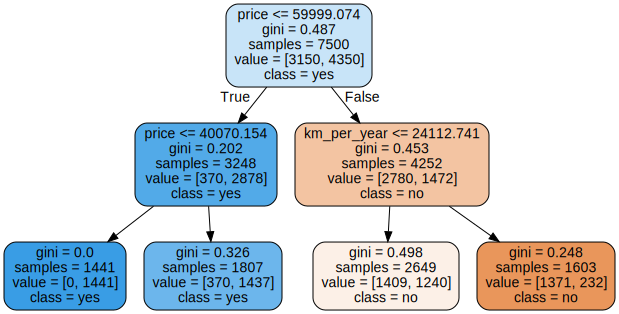

In [35]:
grafico = graphviz.Source(dot_data)
grafico

In [ ]:
# As features 'price' estãao escalaveis, porem para a arvore de decisão nao precisa-se do scaler
# gini é o algoritmo pra ver se a arvore vai quebrar ou não